## Load and Inspect Data

In this section, you will be introduced to three Python libraries essential for data loading and manipulation:

- **xarray**: A library to read NetCDF files and handle N-dimensional arrays with labeled axes.
  - **Example Functions and Syntax**:
    - `xarray.open_dataset('file.nc')`: Load a NetCDF file as an xarray Dataset.
    - `dataset.to_dataframe()`: Convert an xarray Dataset to a Pandas DataFrame.
- **Pandas**: For data manipulation and analysis.
  - **Example Functions and Syntax**:
    - `dataframe.head()`: View the first few rows of the DataFrame.
    - `dataframe.describe()`: Generate descriptive statistics.
- **NumPy**: For numerical operations.
  - **Example Functions and Syntax**:
    - `array = dataset["variable_name"].values`: Create a NumPy array from a variable in the xarray Dataset.
    - `array.mean()`: Compute the mean of array elements.

##### Load the data from the `filename.nc` file using xarray `load_dataset` method.

In [1]:
import xarray as xr

In [2]:
dset = xr.load_dataset("../../data/steinmetz_2016-12-14_Cori.nc")
dset

<xarray.Dataset>
Dimensions:             (trial: 364, time: 250, cell: 734,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 7, spike_id: 2446173)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 359 360 361 362 363 364
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 7 ... 729 730 731 732 733 734
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'ACA' 'LS' ... 'SUB' 'VISp'
  * spike_id            (spike_id) int32 1 2 3 4 ... 2446171 2446172 2446173
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 100 0 100 0 50 0 0 ... 0 100 50 50 0 25 100
    contrast_right      (trial) int8 0 50 50 0 100 0 0 ... 25 100 25 25 50 0 100
    gocue               (trial) float64 1.027 0.8744 0.8252 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 1.0 1.0 -1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.187 1.438 0.986 2.296 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... -0...
    waveform_u          (cell, waveform_component, probe) float32 0.0 ... 0.0
    lfp                 (brain_area_lfp, trial, time) float64 -2.851 ... 5.571
    spike_time          (spike_id) float32 0.2676 2.308 0.8535 ... 2.189 2.399
    spike_cell          (spike_id) uint32 1 1 1 1 1 1 ... 734 734 734 734 734
    spike_trial         (spike_id) uint32 21 21 31 37 43 ... 364 364 364 364 364
Attributes:
    session_date:  2016-12-14
    mouse:         Cori
    stim_onset:    0.5
    bin_size:      0.01

##### Select a subset of the dataset containing only `spike_cell` and `spike_time`.

In [3]:
cols = ["spike_cell", "spike_time"]
dset[cols]

<xarray.Dataset>
Dimensions:     (spike_id: 2446173)
Coordinates:
  * spike_id    (spike_id) int32 1 2 3 4 5 ... 2446170 2446171 2446172 2446173
Data variables:
    spike_cell  (spike_id) uint32 1 1 1 1 1 1 1 ... 734 734 734 734 734 734 734
    spike_time  (spike_id) float32 0.2676 2.308 0.8535 ... 0.6186 2.189 2.399
Attributes:
    session_date:  2016-12-14
    mouse:         Cori
    stim_onset:    0.5
    bin_size:      0.01

##### In the subset also include variable `spike_trial`.

In [4]:
cols = ["spike_trial", "spike_cell", "spike_time"]
dset[cols]

<xarray.Dataset>
Dimensions:      (spike_id: 2446173)
Coordinates:
  * spike_id     (spike_id) int32 1 2 3 4 5 ... 2446170 2446171 2446172 2446173
Data variables:
    spike_trial  (spike_id) uint32 21 21 31 37 43 46 ... 364 364 364 364 364 364
    spike_cell   (spike_id) uint32 1 1 1 1 1 1 1 ... 734 734 734 734 734 734 734
    spike_time   (spike_id) float32 0.2676 2.308 0.8535 ... 0.6186 2.189 2.399
Attributes:
    session_date:  2016-12-14
    mouse:         Cori
    stim_onset:    0.5
    bin_size:      0.01

##### Convert the subset into to a Pandas DataFrame.

In [5]:
df = dset[cols].to_dataframe().reset_index()
df

,spike_id,spike_trial,spike_cell,spike_time
0,1,21,1,0.267635
1,2,21,1,2.308335
2,3,31,1,0.853476
3,4,37,1,2.197501
4,5,43,1,2.452692
...,...,...,...,...
2446168,2446169,364,734,0.266459
2446169,2446170,364,734,0.587060
2446170,2446171,364,734,0.618560
2446171,2446172,364,734,2.188634


##### How many of the cells spiked in the first trial (i.e. trial 1)?

In [6]:
n_active_cells_trial_1 = df[df.spike_trial == 1]["spike_cell"].unique().shape[0]
n_active_cells_trial_1

487

##### What fraction of the total number of cells is that?

In [7]:
n_total_cells = df["spike_cell"].max()
n_total_cells

734

In [8]:
n_active_cells_trial_1 / n_total_cells

0.6634877384196185

##### How many times cell 1 spiked in trial 1?

In [9]:
n_cell1_spikes = df[(df.spike_trial == 1) & (df.spike_cell == 1)].shape[0]
n_cell1_spikes

0

##### Load the spike counts from the xarray dataset as a numpy array

In [10]:
spike_counts = dset["spike_rate"].values
spike_counts.shape

(734, 364, 250)

##### Compute the mean spike count across neurons (i.e. population activity) for each trial and time bin.

In [11]:
dset["spike_rate"].dims

('cell', 'trial', 'time')

In [12]:
spike_counts.mean(axis=0)

array([[0.03814714, 0.03678474, 0.03950954, ..., 0.02861035, 0.01634877,
        0.02588556],
       [0.02861035, 0.02043597, 0.02724796, ..., 0.02588556, 0.02724796,
        0.02043597],
       [0.02861035, 0.02043597, 0.02588556, ..., 0.02997275, 0.01907357,
        0.02588556],
       ...,
       [0.03405995, 0.02861035, 0.04223433, ..., 0.03542234, 0.02316076,
        0.01634877],
       [0.04768392, 0.0613079 , 0.03678474, ..., 0.03405995, 0.04223433,
        0.02861035],
       [0.02588556, 0.02997275, 0.04223433, ..., 0.02997275, 0.04495913,
        0.05177112]])

##### Plot the population activity for all trials and over time with a heatmap.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

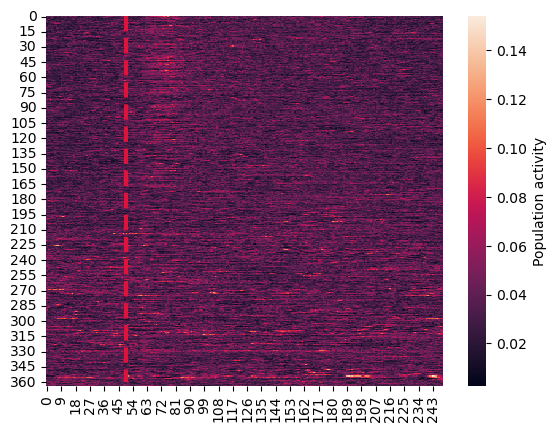

In [14]:
sns.heatmap(spike_counts.mean(axis=0), cbar_kws={"label": "Population activity"})
plt.plot([50, 50], [0, 360], color="crimson", lw=3, ls="--")

## Visualize the spiking activity using spike times

In this section, you will learn about:

- **Matplotlib**: The go-to library for creating static, interactive, and animated visualizations.
  - `plt.scatter()`: Create scatter plots.
  - `plt.xlabel()`, `plt.ylabel()`: Label axes.
  - `plt.title()`: Add a title.
- **Seaborn**: Built on top of Matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.
  - `sns.histplot()`: Create histograms to show distributions.
  - `sns.kdeplot()`: Plot Kernel Density Estimations.

##### Create a scatter plot to visualize spikes for a single neuron across multiple trials.

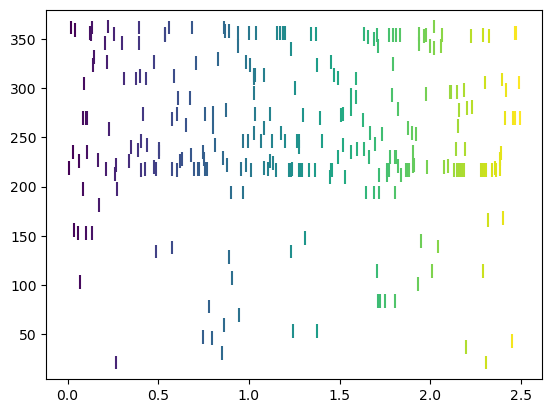

In [15]:
dd = df[df.spike_cell == 1].copy()
plt.scatter(dd.spike_time, dd.spike_trial, marker="|", s=100, c=dd.spike_time);

##### Create a scatter plot to visualize spikes for all neurons in trial 1.

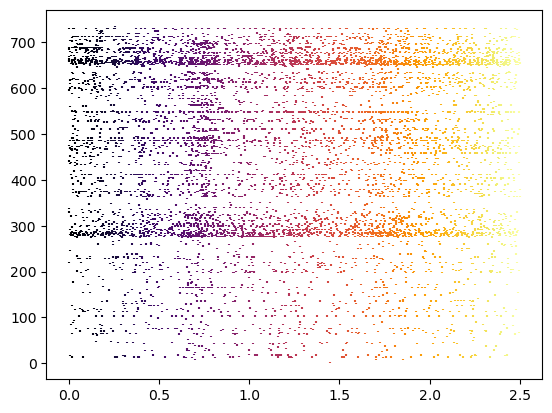

In [16]:
dd = df[df.spike_trial == 1].copy()
plt.scatter(dd.spike_time, dd.spike_cell, marker="|", s=1, c=dd.spike_time, cmap="inferno");

##### Create a histogram (or KDE) of spikes using some seaborn plotting functions.

<Axes: xlabel='spike_time', ylabel='Count'>

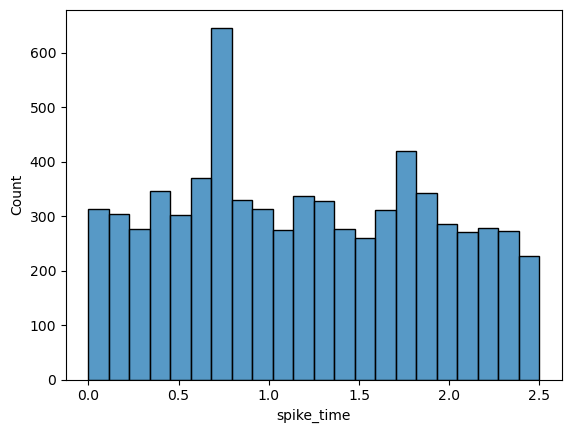

In [17]:
sns.histplot(data=dd, x="spike_time")
# sns.rugplot(data=dd, x="spike_time", height=.1, c="crimson")

##### Overlay the spikes with the histrogram (or KDE).

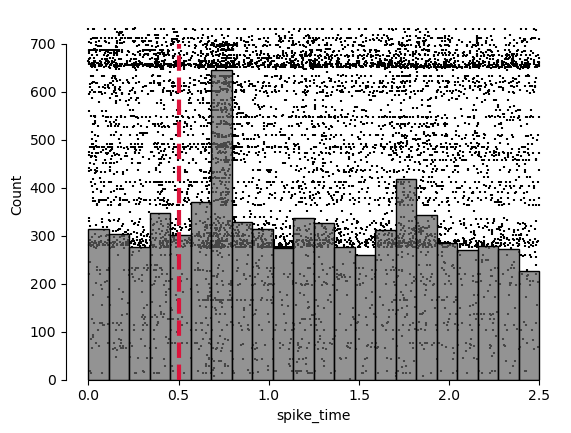

In [18]:
dd = df[df.spike_trial == 1].copy()
plt.scatter(dd.spike_time, dd.spike_cell, marker="|", s=1, c="k", zorder=0) #dd.spike_time, cmap="k");
sns.histplot(data=dd, x="spike_time", color=".4", alpha=.7, zorder=1)
plt.plot([.5, .5], [0, 700], lw=3, ls="--", c="crimson", zorder=2)
sns.despine(trim=True)

##### Save the plot as a pdf file

## Visualize the spiking activity using spike counts

##### Create a heatmap of spike counts for a single neuron across multiple trials.

In [19]:
spike_counts = dset.spike_rate.values
spike_counts.shape

(734, 364, 250)

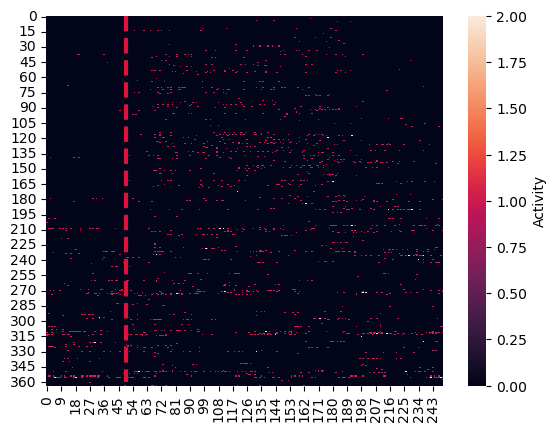

In [20]:
sns.heatmap(spike_counts[2, ...], cbar_kws={"label": "Activity"})
plt.plot([50, 50], [0, 360], color="crimson", lw=3, ls="--")

##### Create a heatmap of spike counts for a multiple neurons in trial 1.

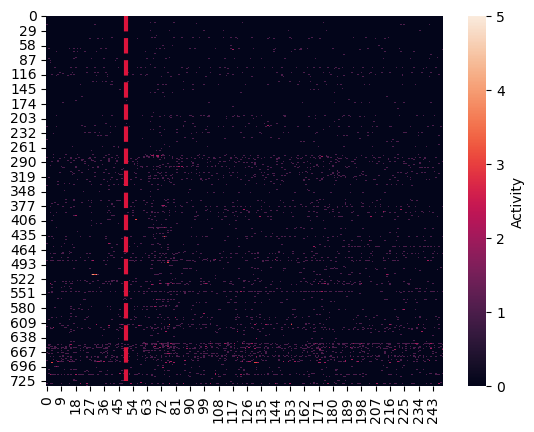

In [21]:
sns.heatmap(spike_counts[:, 0,:], cbar_kws={"label": "Activity"})
plt.plot([50, 50], [0, 725], color="crimson", lw=3, ls="--")

##### Add labels and a color bar to the heatmap.

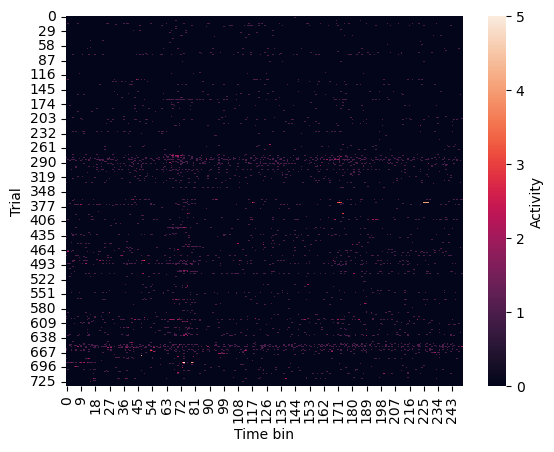

In [22]:
sns.heatmap(spike_counts[:, 0,:], cbar_kws={"label": "Activity"})
plt.xlabel("Time bin")
plt.ylabel("Trial");

##### Create a figure with 2 panels (i.e. subplots):
- **panel 1**: scatter plot to visualize spikes for a single neuron across multiple trials.
- **panel 2**: heatmap of spike counts for a single neuron across multiple trials.

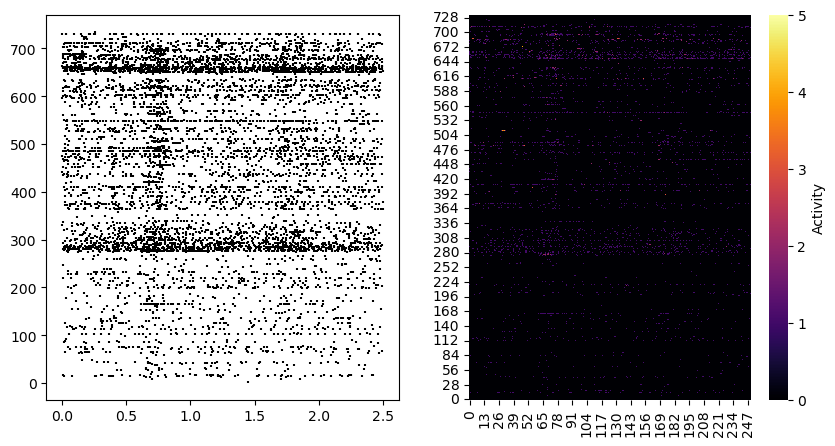

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
dd = df[df.spike_trial == 1].copy()
ax1.scatter(dd.spike_time, dd.spike_cell, marker="|", s=1, c="k");
sns.heatmap(spike_counts[:, 0,:], cbar_kws={"label": "Activity"}, ax=ax2, cmap="inferno")
ax2.invert_yaxis()

##### Save the figure as a pdf file

## Visualize the spiking activity for different brain areas

##### Create a dataframe that contains the brain area for each cell.

In [41]:
brain_region_df = dset["brain_area"].to_dataframe().reset_index()
brain_region_df

,cell,brain_area
0,1,CP
1,2,CP
2,3,CP
3,4,ACB
4,5,ACB
...,...,...
1084,1085,root
1085,1086,root
1086,1087,root
1087,1088,root


##### What brain areas were recorded from this specific mouse?

In [42]:
brain_region_df.brain_area.unique()

array(['CP', 'ACB', 'OT', 'SI', 'SNr', 'LGd', 'ZI', 'CA3', 'root', 'TH'],
      dtype=object)

##### Merge the brain area dataframe and the spike time dataframe.

In [43]:
cols = ['spike_trial', 'spike_cell', 'spike_time']
spike_times_df = dset[cols].to_dataframe().reset_index()
spike_times_df

,spike_id,spike_trial,spike_cell,spike_time
0,1,40,1,0.062105
1,2,40,1,0.075971
2,3,40,1,0.082071
3,4,52,1,2.352062
4,5,52,1,2.375863
...,...,...,...,...
3159263,3159264,426,1089,2.158532
3159264,3159265,426,1089,2.267531
3159265,3159266,426,1089,2.274632
3159266,3159267,426,1089,2.294631


In [44]:
brain_region_df = brain_region_df.rename(columns={"cell": "spike_cell"})

In [45]:
brain_region_df

,spike_cell,brain_area
0,1,CP
1,2,CP
2,3,CP
3,4,ACB
4,5,ACB
...,...,...
1084,1085,root
1085,1086,root
1086,1087,root
1087,1088,root


In [46]:
import pandas as pd

In [47]:
df = pd.merge(spike_times_df, brain_region_df)

In [48]:
df

,spike_id,spike_trial,spike_cell,spike_time,brain_area
0,1,40,1,0.062105,CP
1,2,40,1,0.075971,CP
2,3,40,1,0.082071,CP
3,4,52,1,2.352062,CP
4,5,52,1,2.375863,CP
...,...,...,...,...,...
3159263,3159264,426,1089,2.158532,root
3159264,3159265,426,1089,2.267531,root
3159265,3159266,426,1089,2.274632,root
3159266,3159267,426,1089,2.294631,root


##### Create a scatter plot of spike times for neurons, where neurons are colored based the area they belog to.

<Axes: xlabel='spike_time', ylabel='spike_cell'>

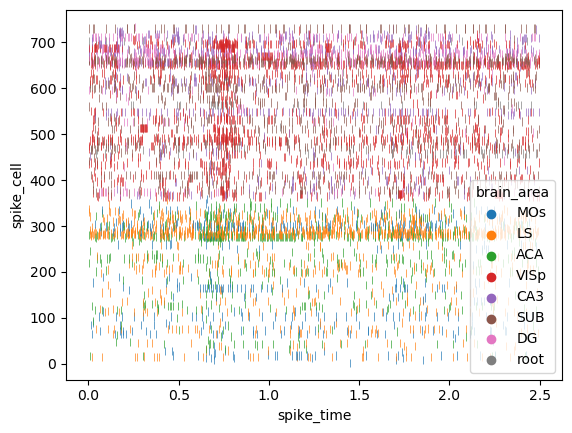

In [32]:
dd = df[df.spike_trial == 1].copy()
sns.scatterplot(x=dd.spike_time, y=dd.spike_cell, marker="|", hue=dd.brain_area) #, c=dd.brain_area, cmap="inferno");

##### Create the same scatter plot as prevous exercise but make sure to have neurons that belong to the same brain area are right after each other.

<Axes: xlabel='spike_time', ylabel='ordered_cell_idx'>

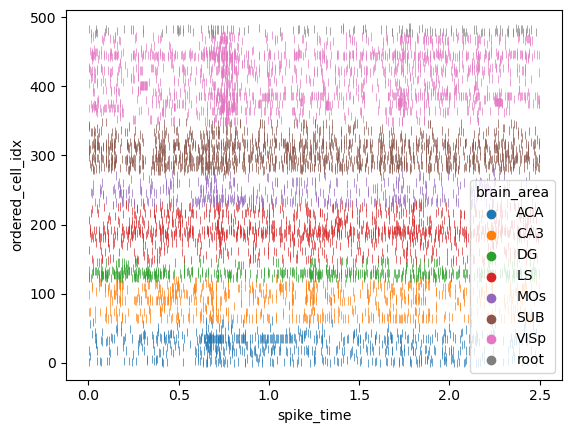

In [33]:
dd = df[df.spike_trial == 1].copy()
dd = dd.sort_values(by="brain_area")
dd["ordered_cell_idx"] = dd.spike_cell.factorize()[0]
sns.scatterplot(x=dd.spike_time, y=dd.ordered_cell_idx, marker="|", hue=dd.brain_area) #, c=dd.brain_area, cmap="inferno");

##### Create a strip plot to show the distribution of population spike counts for each brain region across all trials

In [98]:
pop_spike_count_df = df.groupby(["spike_trial", "brain_area"]).apply(len).reset_index(name="population_spike_count")
pop_spike_count_df

,spike_trial,brain_area,population_spike_count
0,1,ACB,855
1,1,CA3,195
2,1,CP,985
3,1,LGd,206
4,1,OT,16
...,...,...,...
4255,426,SI,1087
4256,426,SNr,786
4257,426,TH,1365
4258,426,ZI,1503


<Axes: xlabel='brain_area', ylabel='population_spike_count'>

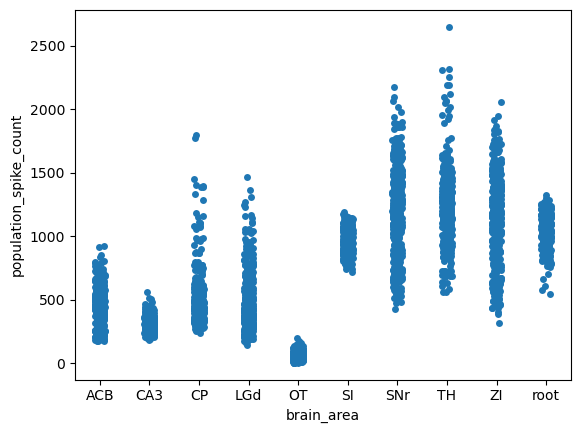

In [99]:
sns.stripplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count")

##### Create a boxen plot for the same data

<Axes: xlabel='brain_area', ylabel='population_spike_count'>

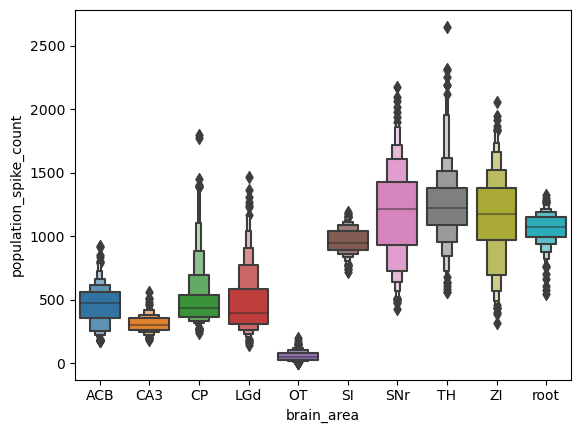

In [100]:
sns.boxenplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count")

##### Overlay the strip plot and the boxen plot in the same plot.

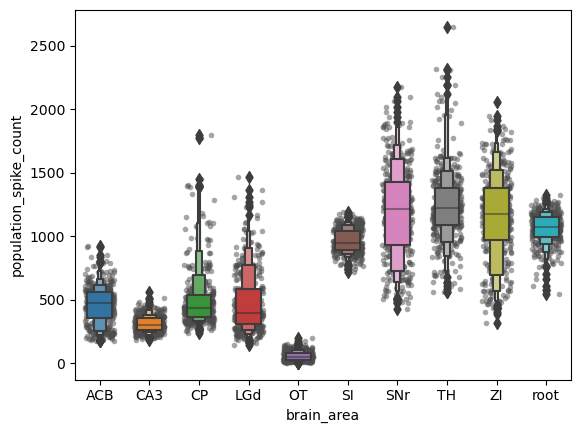

In [137]:
sns.stripplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count", size=4, color=".3", alpha=.5, jitter=.3, zorder=0)
ax = sns.boxenplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count", width=.5)

# Adjust zorder of the boxenplot components
# for artist in ax.lines + ax.patches:
#     artist.set_zorder(1)
    
# desired_alpha = 0.7
# for patch in [col for col in ax.collections]:
#     patch.set_alpha(desired_alpha)

##### Does the distribution change when conditioned on correct vs wrong trials?

In [158]:
cols = ["active_trials", "feedback_type"]
active_trials_df = dset[cols].to_dataframe().reset_index()
active_trials_df = active_trials_df.rename(columns={"trial": "spike_trial"})
pop_spike_count_df = pop_spike_count_df.merge(active_trials_df)
pop_spike_count_df = pop_spike_count_df[pop_spike_count_df.active_trials]
pop_spike_count_df

,spike_trial,brain_area,population_spike_count,active_trials,feedback_type
0,1,ACB,855,True,1.0
1,1,CA3,195,True,1.0
2,1,CP,985,True,1.0
3,1,LGd,206,True,1.0
4,1,OT,16,True,1.0
...,...,...,...,...,...
3155,316,SI,1019,True,-1.0
3156,316,SNr,675,True,-1.0
3157,316,TH,1091,True,-1.0
3158,316,ZI,796,True,-1.0


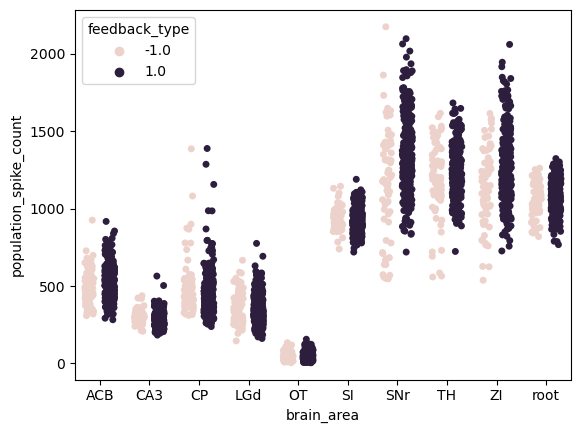

In [170]:
sns.stripplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count", hue="feedback_type", dodge=True, jitter=.2);

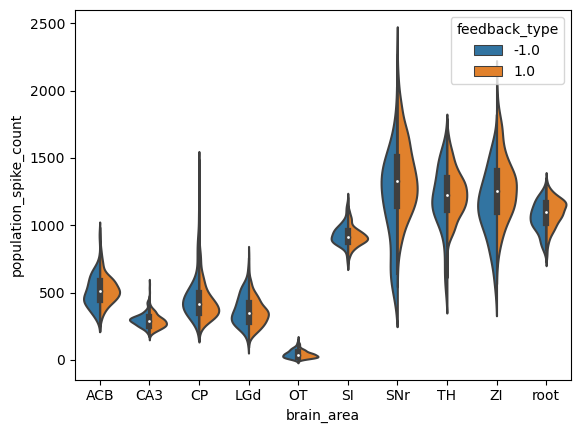

In [172]:
sns.violinplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count", hue="feedback_type", split=True);

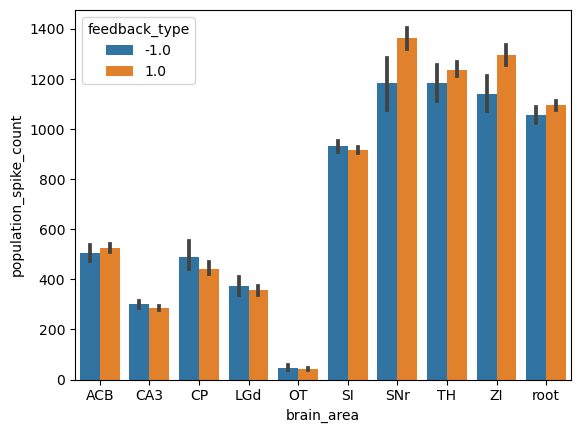

In [177]:
sns.barplot(data=pop_spike_count_df, x="brain_area", y="population_spike_count", hue="feedback_type", errorbar=('ci', 99));

In [191]:
cols = ["brain_area", "brain_groups"]
brain_area_groups_df = dset[cols].to_dataframe().drop_duplicates().reset_index(drop=True)

In [192]:
brain_area_groups_df

,brain_area,brain_groups
0,CP,basal ganglia
1,ACB,basal ganglia
2,OT,basal ganglia
3,SI,basal ganglia
4,SNr,basal ganglia
5,LGd,thalamus
6,ZI,midbrain
7,CA3,hippocampus
8,root,root
9,TH,thalamus


In [195]:
pop_spike_count_df = pop_spike_count_df.merge(brain_area_groups_df)
pop_spike_count_df

,spike_trial,brain_area,population_spike_count,active_trials,feedback_type,brain_groups
0,1,ACB,855,True,1.0,basal ganglia
1,2,ACB,717,True,1.0,basal ganglia
2,3,ACB,588,True,1.0,basal ganglia
3,4,ACB,607,True,1.0,basal ganglia
4,5,ACB,548,True,-1.0,basal ganglia
...,...,...,...,...,...,...
3155,312,root,945,True,1.0,root
3156,313,root,920,True,-1.0,root
3157,314,root,982,True,1.0,root
3158,315,root,992,True,-1.0,root


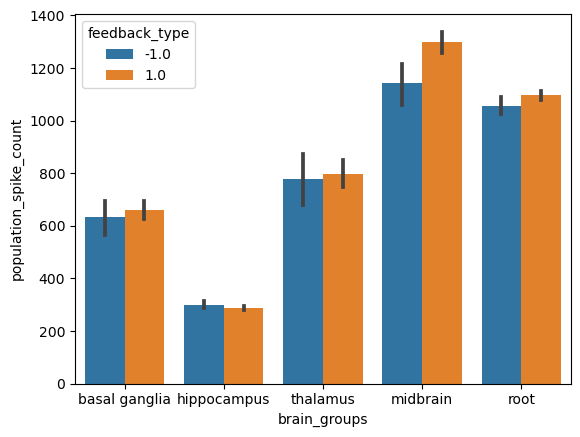

In [201]:
sns.barplot(data=pop_spike_count_df, x="brain_groups", y="population_spike_count", hue="feedback_type", errorbar=("ci", 99));

##### Create a figure with two panels where one panels shows the distribution of spikes across multiple areas for when the mouse was rewarded, and the other panel when the mouse was not rewarded.

##### Save the figure as a pdf file

---

## Get spike counts 3D array from the sparse representations

In [48]:
# time_bin = .01
# time_bins = np.arange(0, df['spike_time'].max() + time_bin, time_bin)  # We add a small number to the maximum time to include the last bin.
# df['time_bin'] = pd.cut(df['spike_time'], bins=time_bins, labels=False, right=True)

time_bin = .01
df['time_bin'] = (df["spike_time"] // time_bin).astype(int)

# Group by neuron, trial, and time_bin, and count spikes
grouped = df.groupby(['spike_cell', 'spike_trial', 'time_bin']).size().reset_index(name='spike_count')

# Pivot to create a 3D matrix
pivot_df = grouped.pivot_table(index='spike_cell', columns=['spike_trial', 'time_bin'], values='spike_count', fill_value=0)

# Convert to a numpy array and reshape
spike_array = pivot_df.values.reshape(pivot_df.shape[0], df['spike_trial'].nunique(), len(time_bins)-1)

## Side analyses

In [34]:
from glob import glob
from tqdm import tqdm
cols = ["contrast_left", "contrast_right", "active_trials"]
dfs = []
for filename in tqdm(glob("data/*.nc")):
    dset = xr.load_dataset(filename)
    df = dset[cols].to_dataframe().reset_index()
    df["name"] = dset.mouse
    dfs.append(df.copy())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:20<00:00,  1.92it/s]


In [35]:
import pandas as pd

In [36]:
df = pd.concat(dfs)

<Axes: xlabel='contrast_right', ylabel='contrast_left'>

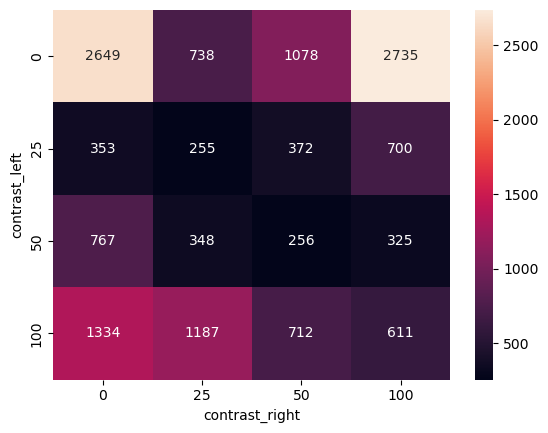

In [37]:
dd = df.pivot_table(index="contrast_left", columns="contrast_right", values="trial", aggfunc=len)
sns.heatmap(data=dd, annot=True, fmt="d")

<Axes: xlabel='contrast_right', ylabel='contrast_left'>

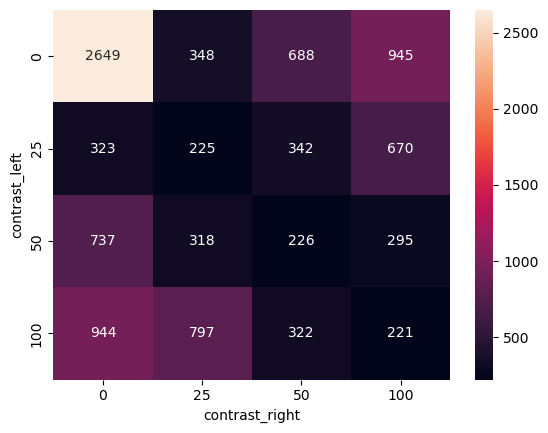

In [38]:
dd = df[df.active_trials].pivot_table(index="contrast_left", columns="contrast_right", values="trial", aggfunc=len)
sns.heatmap(data=dd, annot=True, fmt="d")

<Axes: xlabel='contrast_right', ylabel='contrast_left'>

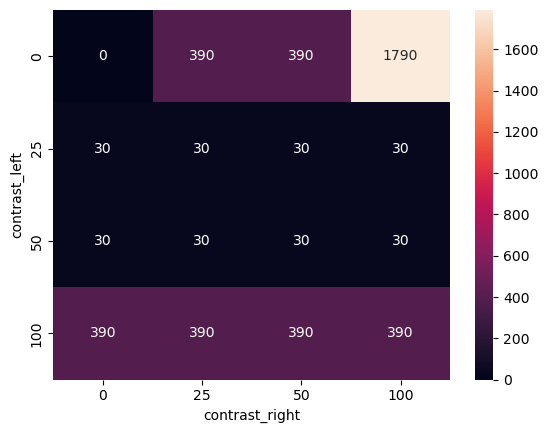

In [39]:
dd = df[~df.active_trials].pivot_table(index="contrast_left", columns="contrast_right", values="trial", aggfunc=len, fill_value=0)
sns.heatmap(data=dd, annot=True, fmt="d")

## From sparse representation to non-sparse

In [31]:
df = dset[cols].to_dataframe().reset_index()
df

,spike_id,spike_trial,spike_cell,spike_time
0,1,21,1,0.267635
1,2,21,1,2.308335
2,3,31,1,0.853476
3,4,37,1,2.197501
4,5,43,1,2.452692
...,...,...,...,...
2446168,2446169,364,734,0.266459
2446169,2446170,364,734,0.587060
2446170,2446171,364,734,0.618560
2446171,2446172,364,734,2.188634
